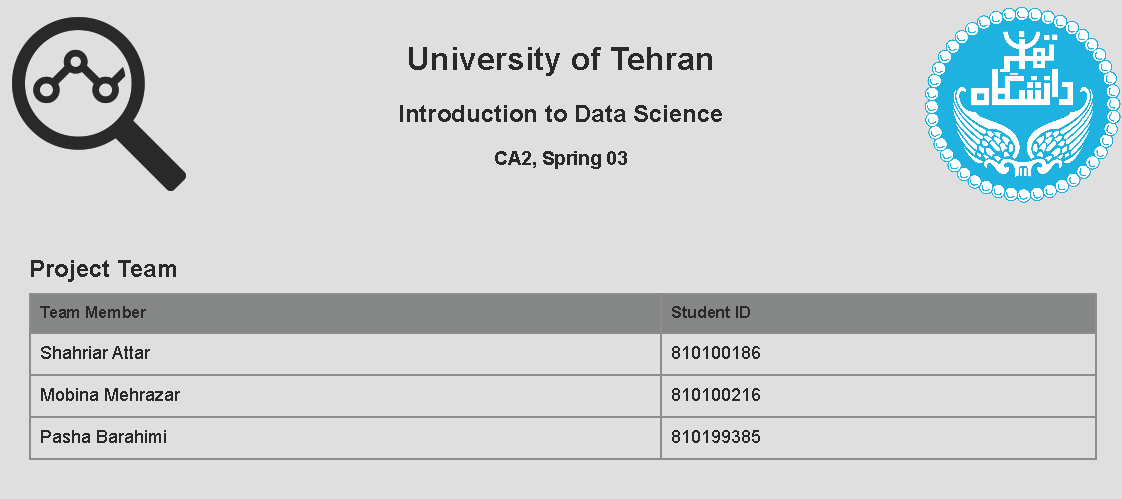


# Investigating Open-Ended Questions

## Table of Contents

-   [Investigating Open-Ended Questions](#Investigating-Open-Ended-Questions)
    -   [Introduction](#Introduction)
    -   [Objectives](#Objectives)
    -   [Tasks](#Tasks)
    -   [Considerations](#Considerations)
    -   [Environment Setup](#Environment-Setup)
    -   [RMS Lusitania (Sunken Ship)](<#RMS-Lusitania-(Sunken-Ship)>)
        -   [Questions Task 1](#Questions-Task-1)
    -   [Scientists Salaries](#Scientists-Salaries)
        -   [Questions Task 2](#Questions-Task-2)
    -   [Resources](#Resources)

## Introduction

This assignment includes specific tasks to investigate open-ended questions. The open-ended questions ask us to think creatively and critically about how the plots we have created provide insight into the data.

## Objectives

-   Getting familiar with `numpy`, `pandas`, and `matplotlib` libraries by looking at RMS Lusitania dataset.
-   Getting some insight into scientists' salaries by looking at the dataset provided.

## Tasks

-   Investigate the RMS Lusitania dataset.
-   Investigate the scientists' salaries dataset.

## Considerations

-   It's important to note that thorough analysis and interpretation of our findings and visualizations are crucial for a comprehensive evaluation in this section.
-   Based on what we have learnt so far, we need to apply different visualization techniques. Also, we need to check the distribution of variables. It’s up to us to decide which plot suits well for which variable(s). our task will be considered ‘successful’ if we have gained enough insights from this dataset.


## Environment Setup

Let's begin with setting up the Python environment and installing necessary libraries.


In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from forex_python.converter import CurrencyRates


In [3]:
TASK_1_CSV = "../data/task1.csv"
TASK_2_CSV = "../data/task2.csv"

## RMS Lusitania (Sunken Ship)

The provided dataset (`task1.csv`) contains information about the passengers of the sunken ship ‘RMS Lusitania’. This is a brief explanation of the columns in the given dataset:

-   **survived**: Indicates if a passenger survived (1) or not (0).
-   **pclass**: The ticket class (1 = First class, 2 = Second class, 3 = Third class).
-   **sex**: The passenger's sex (male or female).
-   **age**: The passenger's age in years.
-   **sibsp**: The number of siblings or spouses the passenger had aboard the ship.
-   **parch**: The number of parents or children the passenger had aboard the ship.
-   **fare**: The fare the passenger paid for the ticket.
-   **embarked**: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).
-   **class**: The class of the ticket the passenger had (First, Second, or Third).
-   **who**: Categorizes passengers as 'man', 'woman', or 'child', likely derived from age and sex.
-   **adult_male**: A boolean indicating if the passenger is an adult male or not.
-   **deck**: The deck the passenger's cabin was on, indicated by letters.
-   **embark_town**: The town from which the passenger embarked, corresponding to the 'embarked' codes.
-   **alive**: Indicates if the passenger survived ('yes') or not ('no')


### Questions Task 1


1. First, we read the file using the pandas library and save it in a pandas dataframe. Then, using the methods 'info', 'head', 'tail', 'describe' from the pandas library, we examine the general structure of the data, and explain what information each of the outputs shows.


In [45]:
df = pd.read_csv(TASK_1_CSV)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


The `info()` method provides a concise summary of the dataframe. It shows the number of non-null values in each column, the data type of each column, and the memory usage of the dataframe. Also, it shows the number of columns and rows in the dataframe.


In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The `head(n)` method displays the first n rows of the dataframe. If n is not provided, it displays the first 5 rows by default.


In [48]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


The `tail(n)` method displays the last n rows of the dataframe. If n is not provided, it displays the last 5 rows by default.


In [49]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The `describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values. It shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values of each column in the dataframe. Obviously, the output of this method is only meaningful for numerical columns and other columns are ignored in the output. Also, we can change the percentiles to be returned by passing a list of percentiles to the `percentiles` parameter.


2. We first show the type of each data column. Some columns are of type categorical and some are of type numerical from the pandas library info. To process the non-numerical columns, one of the possible methods is labeling; in such a way that each of the categories is replaced by a number. For example, in this dataset, there is a categorical column named sex, which includes values Male and Female. By modify the values of this column, each of these models is mapped to one of the numbers in the range [0,1].


In [50]:
label_encoder = LabelEncoder()

labels : dict[str, np.ndarray] = {}
for column in df.columns:
    if df[column].dtype == "object":
        column_data = df[column].dropna()  # Exclude NaN values from the label encoder
        labels[column] = column_data.unique()
        df.loc[column_data.index, column] = label_encoder.fit_transform(column_data)

df = df.infer_objects()  # Convert columns to their appropriate types


In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2.0,2,1,True,NaN,2.0,0,False
1,1,1,0,38.0,1,0,71.2833,0.0,0,2,False,2.0,0.0,1,False
2,1,3,0,26.0,0,0,7.9250,2.0,2,2,False,NaN,2.0,1,True
3,1,1,0,35.0,1,0,53.1000,2.0,0,2,False,2.0,2.0,1,False
4,0,3,1,35.0,0,0,8.0500,2.0,2,1,True,NaN,2.0,0,True


3. Generating a heatmap of the correlation matrix for numerical features in the dataset.


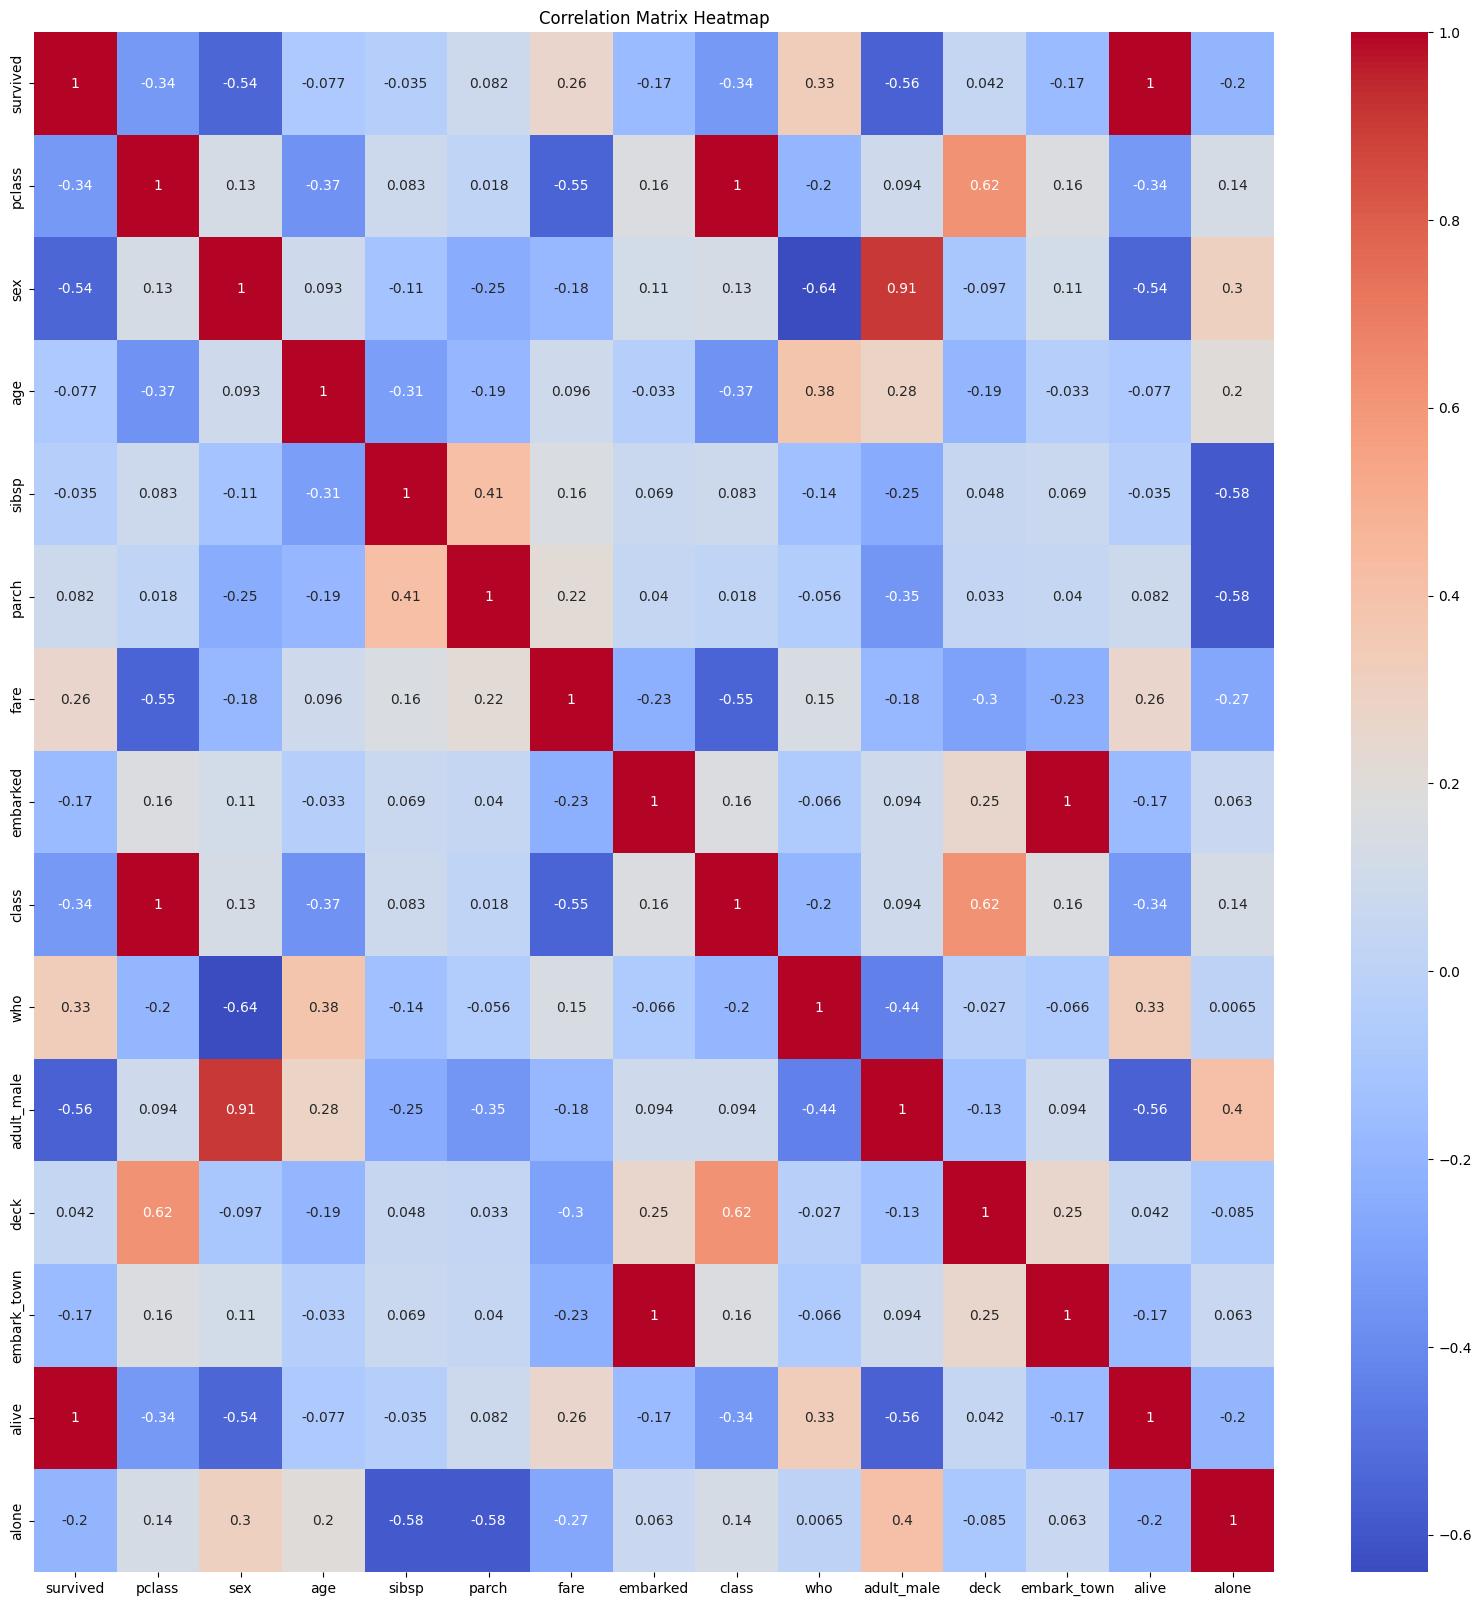

In [52]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

4. Columns that are not on the main diagonal and have a correlation of 1 mean that one column is extra and can be removed. Therefore, based on this, we delete the extra columns that meet these conditions.


In [53]:
corr_matrix = df.corr()

columns_to_remove = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if corr_matrix.iloc[i, j] == 1:
            if corr_matrix.columns[j] != "class": # Do not remove the class column for further use
                columns_to_remove.append(corr_matrix.columns[j])

df = df.drop(columns=columns_to_remove)

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,2.0,2,1,True,NaN,False
1,1,1,0,38.0,1,0,71.2833,0.0,0,2,False,2.0,False
2,1,3,0,26.0,0,0,7.9250,2.0,2,2,False,NaN,True
3,1,1,0,35.0,1,0,53.1000,2.0,0,2,False,2.0,False
4,0,3,1,35.0,0,0,8.0500,2.0,2,1,True,NaN,True


5. Number of passengers survived (survived == 1) the disaster


In [55]:
survived_count = df[df["survived"] == 1]["survived"].sum()  # or simply df["survived"].sum()
print(survived_count)

342


6. Number of female passengers aged more than 30 years


In [56]:
female_old_passengers = df[(df["sex"] == 0) & (df["age"] > 30)]
num_female_passengers = len(female_old_passengers)
print(num_female_passengers)

103


7. Identifying passengers who embarked from Cherbourg ('C') and paid a fare greater than $100


In [57]:
cherbourg_passengers_with_fare_more_than_100 = df[
    (df["embarked"] == labels["embarked"].tolist().index("C")) &
    (df["fare"] > 100)
]
print(len(cherbourg_passengers_with_fare_more_than_100))

0


8. Identifying columns with missing values. Proposing and applying a strategy for handling these missing values

Handling missing values is a crucial step in the data preprocessing phase of any data analysis or machine learning project. Some common strategies:

1. **Listwise Deletion**: This method involves removing entire observations where any single value is missing. This is the simplest method, but it can lead to loss of information if the missing data is not completely at random.

2. **Pairwise Deletion**: In this method, only the specific missing values are deleted. This method is used when values are missing completely at random.

3. **Mean/Median/Mode Imputation**: This involves replacing the missing values with the mean (for continuous data), median (for ordinal data), or mode (for categorical data). This method is quick and easy but can lead to an underestimation of the variance.

4. **Prediction Models**: Missing values are predicted using methods like regression, using the other variables in the data. While this can be a very accurate method, it can also be time-consuming.

5. **Multiple Imputation**: This is a more sophisticated version of prediction models. It creates multiple predictions for each missing value, resulting in multiple complete datasets. These are then analyzed separately, and the results are pooled to give a final result.

6. **Last Observation Carried Forward (LOCF)**: This method is often used in time-series data where the last known value is used to replace the missing value.

7. **Next Observation Carried Backward (NOCB)**: This is the opposite of LOCF, the next known value is used to replace the missing value.

Let's check the columns with missing values and propose a strategy for handling them.


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    float64
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  deck        203 non-null    float64
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(4), int64(7)
memory usage: 78.4 KB


We can use a combination of these methods based on the nature of the data and the missing values. It is important to remember that the method chosen can have a significant impact on the results of the analysis. The following columns have missing values in the dataset:

1. **age**: 177 missing values
2. **embarked**: 2 missing values
3. **deck**: 688 missing values

For the `deck` column, we can see that it has a large number of missing values (688 out of 891). It might be better to drop this column entirely as imputing the missing values might introduce bias into the analysis. For the `age` column, we can use mean or median imputation to fill in the missing values. For the `embarked` column, we can use mode imputation to fill in the missing values, or we can drop the rows with missing values if they are not significant.


In [59]:
df = df.drop(columns=["deck"])
df["age"] = df["age"].fillna(df["age"].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode().iloc[0])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int32  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(7)
memory usage: 68.0 KB


9. The average age of passengers on the ship is calculated. Then, difference between the males and females is calculated.


In [64]:
average_age = df["age"].mean()
male_age = df[df["sex"] == labels["sex"].tolist().index("male")]["age"].mean()
female_age = df[df["sex"] == labels["sex"].tolist().index("female")]["age"].mean()
age_difference = male_age - female_age

print("Average Age of Passengers:", average_age)
print("Average Age of Males:", male_age)
print("Average Age of Females:", female_age)
print("Age Difference between Males and Females:", age_difference)

Average Age of Passengers: 29.69911764705882
Average Age of Males: 28.21673004870738
Average Age of Females: 30.505824243042102
Age Difference between Males and Females: -2.289094194334723


10. Investigating the probable correlation between fare paid and survival rate, and providing a statistical summary


In [65]:
correlation = df["fare"].corr(df["survived"])
summary = df[["fare", "survived"]].describe()

print("Correlation between fare paid and survival rate:", correlation)
print("\nStatistical summary of fare paid and survival rate:")
print(summary)

Correlation between fare paid and survival rate: 0.2573065223849622

Statistical summary of fare paid and survival rate:
             fare    survived
count  891.000000  891.000000
mean    32.204208    0.383838
std     49.693429    0.486592
min      0.000000    0.000000
25%      7.910400    0.000000
50%     14.454200    0.000000
75%     31.000000    1.000000
max    512.329200    1.000000


11. Using Matplotlib to plot the proportion of passengers that survived by class


In [66]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,True,False
1,1,1,0,38.000000,1,0,71.2833,0,0,2,False,False
2,1,3,0,26.000000,0,0,7.9250,2,2,2,False,True
3,1,1,0,35.000000,1,0,53.1000,2,0,2,False,False
4,0,3,1,35.000000,0,0,8.0500,2,2,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,True,True
887,1,1,0,19.000000,0,0,30.0000,2,0,2,False,True
888,0,3,0,29.699118,1,2,23.4500,2,2,2,False,False
889,1,1,1,26.000000,0,0,30.0000,0,0,1,True,True


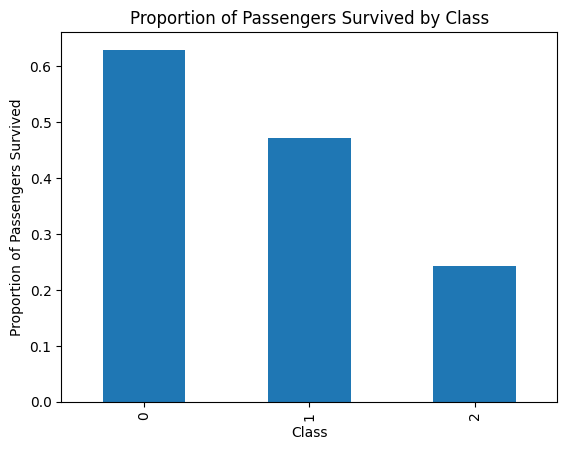

In [67]:
survived_by_class = df.groupby("class")["survived"].mean()
survived_by_class.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Proportion of Passengers Survived")
plt.title("Proportion of Passengers Survived by Class")
plt.show()

12. Plotting the age distribution of passengers, distinguishing between those who survived and those who didn't


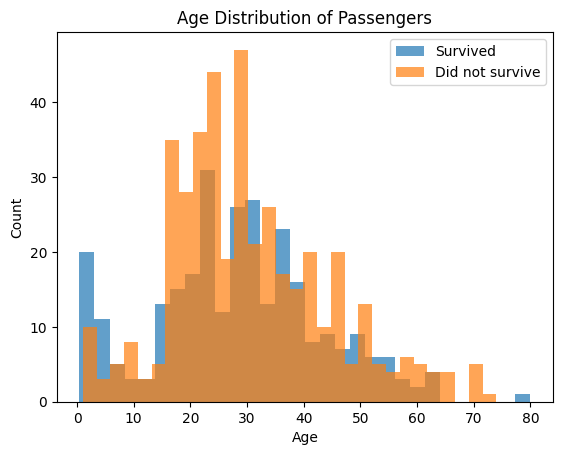

In [45]:
plt.hist(df[df["survived"] == 1]["age"], bins=30, alpha=0.7, label="Survived")
plt.hist(df[df["survived"] == 0]["age"], bins=30, alpha=0.7, label="Did not survive")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.legend()
plt.show()

13. Creating a scatter plot showing the relationship between age and fare paid, color-coded by survival


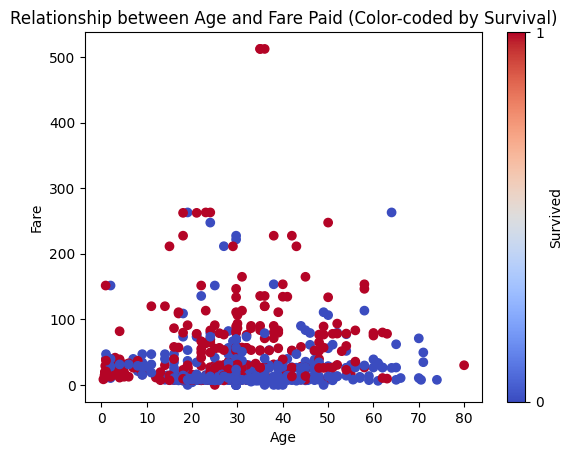

In [76]:
plt.scatter(df["age"], df["fare"], c=df["survived"], cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship between Age and Fare Paid (Color-coded by Survival)")
plt.colorbar(label="Survived", ticks=[0, 1])
plt.show()

14. Creating a pivot table to show the average fare and survival rate for each class and sex combination


In [77]:
pivot_table = df.pivot_table(
    values=["fare", "survived"],
    index=["class", "sex"],
    aggfunc={"fare": "mean", "survived": "mean"},
)
print(pivot_table)

                 fare  survived
class sex                      
0     0    106.125798  0.968085
      1     67.226127  0.368852
1     0     21.970121  0.921053
      1     19.741782  0.157407
2     0     16.118810  0.500000
      1     12.661633  0.135447


15. And finally, plotting a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status


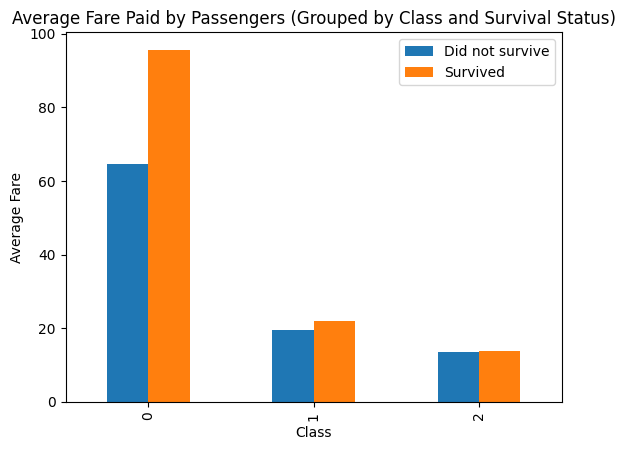

In [78]:
grouped_data = df.groupby(["class", "survived"])["fare"].mean()
grouped_data.unstack().plot(kind="bar")

plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.title("Average Fare Paid by Passengers (Grouped by Class and Survival Status)")
plt.legend(["Did not survive", "Survived"])
plt.show()

## Scientists Salaries

This dataset (`task2.csv`) focuses on data scientist salaries across different regions from 2020 to 2024.


### Questions Task 2


1. At first, it's better to do some pre-analysis to delete duplicates and NA (missing) data if they exist. Then, since salaries are inherently tied to each respective country's currency, we need to standardize them to a single currency for meaningful comparisons. We begin by identifying the currencies present in the dataset. Given the many currencies, let's examine their frequencies and remove data associated with currencies represented fewer than ten times


In [153]:
df = pd.read_csv(TASK_2_CSV)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


In [155]:
df.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium


Let's check for missing values in the dataset.


In [156]:
nan_count = df.isna().sum()
print(nan_count)

Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64


As we can see, there is no missing data in the dataset to handle. Now, let's move on to the next step and check for duplicates in the dataset.


In [157]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

5565


As we can see, there are 5565 duplicates in the dataset. We need to remove these duplicates to avoid any bias in the analysis. Let's remove the duplicates and check the shape of the dataset again.


In [158]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 525.6+ KB


Now, let's identify the currencies present in the dataset and examine their frequencies. We will remove data associated with currencies represented fewer than ten times.


In [160]:
df["Salary_Currency"].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64

In [161]:
df = df[df["Salary_Currency"].map(df["Salary_Currency"].value_counts()) > 10]
df = df.reset_index(drop=True)

In [162]:
df["Salary_Currency"].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

2. In this phase, we'll convert these currencies to USD. You can do this in two ways: manually searching for the exchange rates via online resources such as Google or utilizing software packages like Forex-Python for streamlined conversion.


In [163]:
df.tail()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
8355,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
8356,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
8357,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
8358,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large
8359,2021,Senior-Level,Full-Time,Data Science Manager,7000000,INR,50,Large


In [164]:
c = CurrencyRates()

In [165]:
rates = {currency: c.get_rate(currency, "USD") for currency in df["Salary_Currency"].unique()}
print(rates)

{'USD': 1.0, 'EUR': 1.0768, 'GBP': 1.2578704514923194, 'CAD': 0.7416999586719933, 'AUD': 0.6519343706484229, 'INR': 0.012047235725513668}


In [166]:
df["Salary_USD"] = df["Salary_Currency"].map(rates) * df["Salary"]
df = df.drop(columns=["Salary_Currency", "Salary"])

In [167]:
df.tail()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Remote_Ratio,Company_Size,Salary_USD
8355,2020,Senior-Level,Full-Time,Data Scientist,100,Large,412000.000000
8356,2021,Mid-Level,Full-Time,Principal Data Scientist,100,Large,151000.000000
8357,2020,Entry-Level,Full-Time,Data Scientist,100,S,105000.000000
8358,2020,Entry-Level,Contract,Business Data Analyst,100,Large,100000.000000
8359,2021,Senior-Level,Full-Time,Data Science Manager,50,Large,84330.650079


3. Now, leveraging the insights gleaned from your dataset, We employ various Exploratory Data Analysis (EDA) techniques to extract valuable insights. For instance, we could identify the top 10 most popular job titles or the top 10 highest salaries.


## Resources
